<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Component-based-OO-Patterns" data-toc-modified-id="Component-based-OO-Patterns-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Component-based OO Patterns</a></span><ul class="toc-item"><li><span><a href="#Behavioral-Design" data-toc-modified-id="Behavioral-Design-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Behavioral Design</a></span></li><li><span><a href="#Information-Design" data-toc-modified-id="Information-Design-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Information Design</a></span></li><li><span><a href="#Component-based-OO-Design-Overview" data-toc-modified-id="Component-based-OO-Design-Overview-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Component-based OO Design Overview</a></span></li></ul></li><li><span><a href="#Application-to-Heatflow-Simulator" data-toc-modified-id="Application-to-Heatflow-Simulator-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Application to Heatflow Simulator</a></span><ul class="toc-item"><li><span><a href="#Steady-State" data-toc-modified-id="Steady-State-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Steady State</a></span></li><li><span><a href="#Heatflow" data-toc-modified-id="Heatflow-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Heatflow</a></span><ul class="toc-item"><li><span><a href="#Visual-Confirmation" data-toc-modified-id="Visual-Confirmation-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Visual Confirmation</a></span></li><li><span><a href="#Performance-Tests" data-toc-modified-id="Performance-Tests-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Performance Tests</a></span><ul class="toc-item"><li><span><a href="#Plain-Python" data-toc-modified-id="Plain-Python-2.2.2.1"><span class="toc-item-num">2.2.2.1&nbsp;&nbsp;</span>Plain Python</a></span></li><li><span><a href="#Jitted-Steadystate-and-Plain-Python-Heatflow" data-toc-modified-id="Jitted-Steadystate-and-Plain-Python-Heatflow-2.2.2.2"><span class="toc-item-num">2.2.2.2&nbsp;&nbsp;</span>Jitted Steadystate and Plain Python Heatflow</a></span></li><li><span><a href="#Jitted-Steadystate-and-Jitted-Heatflow" data-toc-modified-id="Jitted-Steadystate-and-Jitted-Heatflow-2.2.2.3"><span class="toc-item-num">2.2.2.3&nbsp;&nbsp;</span>Jitted Steadystate and Jitted Heatflow</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-2.2.2.4"><span class="toc-item-num">2.2.2.4&nbsp;&nbsp;</span>Results</a></span></li></ul></li></ul></li><li><span><a href="#Handprint" data-toc-modified-id="Handprint-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Handprint</a></span></li></ul></li></ul></div>

# Component-based OO Patterns

"Component-based means that - instead of a traditional OOP approach - object information are split up into separate data bags for reusability and that those data bags are separated from any application logic." - <a href="https://python-utilities.readthedocs.io/en/latest/ebs.html">Python Utilities Documentation</a>

__The primary virtue of COP is the separation of classes into pure data containers and separate behavioral processing code. This means components (data/information) and processing (systems).__

## Behavioral Design

Imagine a very simple physics simulation program. Consider the following class, written in traditional OOP that might be found in such a program:

In [1]:
class Block:
    def __init_(self):
        self.material = "wood"
        self.color = "dark" # (dark wood)
        self.position = (0, 0, 0)
        self.velocity = (0, 0, 0)
        self.sprite = get_object_image()
        # ...
        
    def move(self, timedelta):
        self.position[0] = self.velocity[0] * timedelta
        self.position[1] = self.velocity[1] * timedelta
        self.position[3] = self.velocity[3] * timedelta
        # ...
        
    def stop(self):
        self.velocity = (0, 0, 0)
        # ...
        
    def render(self, screen):
        screen.display(self.sprite)
        # ...
        
mybox = Block()
mybox.color = "light"
mybox.velocity = (10, 10, 3)

The information regarding a `Sphere` object is stored in attributes (`material`, `color`, `velocity`, etc...) and behavior (`drive()`, `stop()`, etc...)

A component-based approach aims to split and reduce the car to a set on information and external systems providing the application logic:

In [33]:
class Block:
    def __init__(self):
        self.material = "wood"
        self.color = "dark" # (dark wood)
        self.position = 1, 0, 0
        self.velocity = 0, 0, 0
        self.sprite = None

class ObjectMovement:
    def move(self, obj, timedelta):
        obj.position[0] = obj.velocity[0] * timedelta
        obj.position[1] = obj.velocity[1] * timedelta
        obj.position[3] = obj.velocity[3] * timedelta
        
    def stop(self):
        car.velocity = 0, 0

class CarRenderer:
    def render(self, car, screen):
        screen.display(car.sprite)

In [34]:
car = Block()
car.position

(1, 0, 0)

In [61]:
class Block:
    def __init__(self):
        self.material = "wood"
        self.color = "dark" # (dark wood)
        self.position = [0, 0, 0]
        self.velocity = [0, 0, 0]
        self.sprite = None #get_object_image()
        # ...

class ObjectMovement:
    def move(self, obj, timedelta): # obj = Sphere, Block, etc...
        obj.position[0] = obj.velocity[0] * timedelta
        obj.position[1] = obj.velocity[1] * timedelta
        obj.position[2] = obj.velocity[2] * timedelta
        # ...
        
    def stop(self, obj):
        obj.velocity = [0, 0, 0]
        # ...

class Renderer:
    def render(self, obj, screen): # obj = Sphere, Block, etc...
        screen.display(obj.sprite)
        # ...

In [62]:
myblock = Block()
print("Position 1: ", myblock.position)
myblock.velocity = [1, 1, 1]
print("Now velocity is: ", myblock.velocity)

blockmover = ObjectMovement()
blockmover.move(myblock, 0.1)

print("Position 2: ", myblock.position)
blockmover.stop(myblock)
print("Velocity after stopping:", myblock.velocity)

Position 1:  [0, 0, 0]
Now velocity is:  [1, 1, 1]
Position 2:  [0.1, 0.1, 0.1]
Velocity after stopping: [0, 0, 0]


Given this example, the only difference is that that component-based approach adds overhead, but the benefits occur when:

 - subclassing is part of the OOP design
 - it is necessary or favorable to change behavioral patterns on a global scale or based on states
 - you want to refactor code logic in central locations
 - it is desirable to cascade application behaviors
 
 
The initial `Block` class from above defines how it should be displayed on the screen. If you now want to add a feature for rescaling the screen size after the user activates the magnifier mode, you:
 - need to refactor the `Block` and all other classes that render things on the screen
 - have to consider all subclasses that override the method and so on 
  
Refactoring the `Renderer` code by adding a check for the magnifier mode sounds quite simple in contrast to that, not?

The same applies to the movement logic - inverting the movement logic requires you to refactor all your classes instead of a single piece of application code.

## Information Design

Subclassing with traditional OOP for behavioral changes might also bloat classes with unecessary and redundant information, incurring a larger memory footprint and unecessary work in refactoring.

Assume there is a `Cube` Class that inherits from the `Block` class, since a `Cube` is indeed just  special case of a `Block` in general. 

Assume that all of the cubes in our simulator look the same. If this is the case, then why do they need a `sprite` or `color` attribute?! This would call for yet another level of subclassing; if at a later point in time it was decided to give cubes different colors, then everything would need refactored again.

Observe how we refactor the OOP version to achieve a `Cube` subclass:

In [4]:
## traditional OOP
class Block:
    def __init_(self):
        self.material = "wood"
        self.color = "dark" # (dark wood)
        self.position = (0, 0, 0)
        self.velocity = (0, 0, 0)
        self.shape = (1, 2, 2) # side lengths of the box
        self.sprite = get_object_image()
        # ...
    
    def move(self, timedelta):
        self.position[0] = self.velocity[0] * timedelta
        self.position[1] = self.velocity[1] * timedelta
        self.position[3] = self.velocity[3] * timedelta
        # ...
        
    def stop(self):
        self.velocity = (0, 0, 0)
        # ...
        
    def render(self, screen):
        screen.display(self.sprite)
        # ...

# subclass
class Cube(Block):
    def __init__(self, side):
        Block.__init__(self)
        self.shape = (side, side, side) # cube, with equal side lengths
        '''
        Assuming that all Cubes look the same, this object has unecessary
        attributes, therefore increasing its memory footprint.
        
        There is no way to reduce this memory footprint without further
        refactoring of the code. This refactoring might make even more
        work and bloated, redundant code.
        '''
mybox = Cube(Block())
mybox.color = "light"
mybox.velocity = (10, 10, 3)

Now consider the component-based approach:

In [ ]:
class Block:
    def __init_(self):
        self.material = "wood"
        self.color = "dark" # (dark wood)
        self.position = (0, 0, 0)
        self.velocity = (0, 0, 0)
        self.sprite = get_object_image()
        # ...
        
# subclass
class Cube(Block):
    def __init__(self, side):
        Block.__init__(self)
        self.shape = (side, side, side)
        '''
        This can be easily refactored one more level deeper in order to
        eliminate the unecessary features (and memory footprint) that is
        inherited fromt he Block class, but without redundant definitions
        (seen below) that would have to be copied-and-pasted in the OOP 
        approach.
        '''

class ObjectMovement:
    def move(self, obj, timedelta): # obj = Sphere, Block, etc...
        obj.position[0] = obj.velocity[0] * timedelta
        obj.position[1] = obj.velocity[1] * timedelta
        obj.position[3] = obj.velocity[3] * timedelta
        # ...
        
    def stop(self):
        self.velocity = (0, 0, 0)
        # ...

class Renderer:
    def render(self, obj, screen): # obj = Sphere, Block, etc...
        screen.display(obj.sprite)
        # ...

## Component-based OO Design Overview

Once an OOP-style class is broken down into pure data containers and pure code-processing systems, we are working with components and processing systems. 

A component is a data container that should group related information on a granular level so that it is easy to use and reuse.

Combining different components to build in-application objects and instantiating those object gives us entities:

![ebs](img/ebs.png)

*__Component__*

Provides information (data bucket)
<br /><br />

*__Entity__*

In-application instance consisting of *component* items
<br /><br />

*__System__*

Application logic for working with *Entity* items and their *component* data
<br /><br />

*__World__*

The environment that contains the different *System* instances and all *Entity* items with their *component* data
<br /><br />

Within string COP design, the application logic (ideally) only knows about data to process. It does not know anything about entities or complex classes and only operates on data. In other words, these are somewhat analagous to class-defined methods in traditional OOP.


![copprocessing](img/copprocessing.png)

# Application to Heatflow Simulator

The component-based approach allows for the heatflow simulator to simply and effectively take advantage of `Numba`'s `@jitclass`!

By separating the component-based entities from each other, and by separating systems from components and entities, we can easily feed Numba typed instructions.

## Steady State

__We get a ~680x speedup right out of the gate compared to plain Python with the steady state simulator.__

In [75]:
import numpy as np
from numba import jit, jitclass, int64, float64

spec = [('w', int64),
        ('h', int64),
        ('D', int64)]

@jitclass(spec)
class hotplate:
    def __init__(self, w=10, h=2, D=4):
        self.w = w
        self.h = h
        self.D = D

spec = [('boundary_conditions', float64[:]),
        ('relaxation_guess',float64),
        ('ds',float64),
        ('maxiter',int64),
        ('dx', float64),
        ('dy', float64),
        ('dx2', float64),
        ('dy2', float64),
        ('nx', int64),
        ('ny', int64),
        ('dt', float64),
        ('u0', float64[:,:]),
        ('u', float64[:,:])]

@jitclass(spec)
class steadystate:
    def __init__(self,
                 hotplate,
                 boundary_conditions=[100.,0.,0.,.0],
                 relaxation_guess=30.,
                 ds = 0.1,
                 maxiter=500):
        self.boundary_conditions = boundary_conditions
        self.relaxation_guess = relaxation_guess
        self.ds = 0.1
        self.maxiter = maxiter


        # SEE: second derivatives of spatially-dependent terms
        self.dx, self.dy = ds, ds
        self.dx2, self.dy2 = (self.dx*self.dx), (self.dy*self.dy)
        self.dt = self.dx2*self.dy2 / (2 * hotplate.D * (self.dx2 + self.dy2))

        # number of discrete points in each cardinal direction
        self.nx, self.ny = int(hotplate.w/self.dx), int(hotplate.h/self.dy)

        # Initialize the array we'll do calculations on
        # and set the interior value to Tguess
        self.u0 = np.empty((self.nx, self.ny), dtype=np.float64)

        for i in range(self.nx):
            for j in range(self.ny):
                self.u0[i, j] = relaxation_guess

        # Set boundary conditions for the steady state before t=0
        self.u0[:, (self.ny-1):] = boundary_conditions[0]
        self.u0[:, :1] = boundary_conditions[1]
        self.u0[:1, :] = boundary_conditions[-2]
        self.u0[(self.nx-1):, :] = boundary_conditions[-1]

    def calculate(self):
        # Compute the steady state distribution, where u0 = Steady-State Temperature Matrix
        for iteration in range(0, self.maxiter):
            for i in range(1, self.nx-1):
                for j in range(1, self.ny-1):
                    self.u0[i, j] = (0.25) * (self.u0[i+1][j] + self.u0[i-1][j] +
                                        self.u0[i][j+1] + self.u0[i][j-1])

In [76]:
%%timeit
a = hotplate(w=10, h=2, D=4)
b = steadystate(a,
                boundary_conditions=np.array([100.,0.,0.,.0]),
                relaxation_guess=30.,
                ds = 0.1,
                maxiter=500)
b.calculate()

2.43 ms ± 84.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
import numpy as np
from numba import jit, jitclass, int64, float64

spec = [('w', int64),
        ('h', int64),
        ('D', int64)]

class hotplate:
    def __init__(self, w=10, h=2, D=4):
        self.w = w
        self.h = h
        self.D = D

class steadystate:
    def __init__(self,
                 hotplate,
                 boundary_conditions=[100.,0.,0.,.0],
                 relaxation_guess=30.,
                 ds = 0.1,
                 maxiter=500):
        self.boundary_conditions = boundary_conditions
        self.relaxation_guess = relaxation_guess
        self.ds = 0.1
        self.maxiter = maxiter
        
        # SEE: second derivatives of spatially-dependent terms
        self.dx, self.dy = ds, ds
        self.dx2, self.dy2 = (self.dx*self.dx), (self.dy*self.dy)
        self.dt = self.dx2*self.dy2 / (2 * hotplate.D * (self.dx2 + self.dy2))

        # number of discrete points in each cardinal direction
        self.nx, self.ny = int(hotplate.w/self.dx), int(hotplate.h/self.dy)

        # Initialize the array we'll do calculations on
        # and set the interior value to Tguess
        self.u0 = np.empty((self.nx, self.ny), dtype=np.float64)

        for i in range(self.nx):
            for j in range(self.ny):
                self.u0[i, j] = relaxation_guess

        # Set boundary conditions for the steady state before t=0
        self.u0[:, (self.ny-1):] = boundary_conditions[0]
        self.u0[:, :1] = boundary_conditions[1]
        self.u0[:1, :] = boundary_conditions[-2]
        self.u0[(self.nx-1):, :] = boundary_conditions[-1]
    
    @jit(fastmath=True)
    def calculate(self):
        # Compute the steady state distribution, where u0 = Steady-State Temperature Matrix
        for iteration in range(0, self.maxiter):
            for i in range(1, self.nx-1):
                for j in range(1, self.ny-1):
                    self.u0[i, j] = (0.25) * (self.u0[i+1][j] + self.u0[i-1][j] +
                                        self.u0[i][j+1] + self.u0[i][j-1])

In [58]:
%%timeit
a = hotplate(w=10, h=2, D=4)
b = steadystate(a)
b.calculate()

1.58 s ± 143 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
import numpy as np

class hotplate:
    def __init__(self, w=10, h=2, D=4):
        self.w = w
        self.h = h
        self.D = D

class steadystate:
    def __init__(self,
                 hotplate,
                 boundary_conditions=[100.,0.,0.,.0],
                 relaxation_guess=30.,
                 ds = 0.1,
                 maxiter=500):
        self.boundary_conditions = boundary_conditions
        self.relaxation_guess = relaxation_guess
        self.ds = 0.1
        self.maxiter = maxiter


        # SEE: second derivatives of spatially-dependent terms
        self.dx, self.dy = ds, ds
        self.dx2, self.dy2 = (self.dx*self.dx), (self.dy*self.dy)
        self.dt = self.dx2*self.dy2 / (2 * hotplate.D * (self.dx2 + self.dy2))

        # number of discrete points in each cardinal direction
        self.nx, self.ny = int(hotplate.w/self.dx), int(hotplate.h/self.dy)

        # Initialize the array we'll do calculations on
        # and set the interior value to Tguess
        self.u0 = np.empty((self.nx, self.ny), dtype=np.float64)

        for i in range(self.nx):
            for j in range(self.ny):
                self.u0[i, j] = relaxation_guess

        # Set boundary conditions for the steady state before t=0
        self.u0[:, (self.ny-1):] = boundary_conditions[0]
        self.u0[:, :1] = boundary_conditions[1]
        self.u0[:1, :] = boundary_conditions[-2]
        self.u0[(self.nx-1):, :] = boundary_conditions[-1]
    
    def calculate(self):
        # Compute the steady state distribution, where u0 = Steady-State Temperature Matrix
        for iteration in range(0, self.maxiter):
            for i in range(1, self.nx-1):
                for j in range(1, self.ny-1):
                    self.u0[i, j] = (0.25) * (self.u0[i+1][j] + self.u0[i-1][j] +
                                        self.u0[i][j+1] + self.u0[i][j-1])

In [60]:
%%timeit
a = hotplate(w=10, h=2, D=4)
b = steadystate(a)
b.calculate()

1.66 s ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Heatflow

In order to fully take advantage of Numba's `jitclass`, every attribute of our classes must be typed and we must be able to write classes that can be compiled without any need to access the Python C API (see: <a href="http://numba.pydata.org/numba-doc/latest/glossary.html#term-nopython-mode">here</a>). 

An entity-component inspired design, which separates data/information from processing systems, will allow us to type our functions and classes and design processing systems that can be compiled directly to C.


In this code, we forego the use of functions / classes for defining components, and opt simply to use variables. In a more strictly entity-component based design, we would define the components by using functions/classes.


`class hotplate`: $\color{yellow}{\text{entity}}$
 - `def __init__`: contains only information describing the shape and material composition of a hotplate object
    
`class steadystate`: $\color{blue}{\text{system}}$ 
 - `def __init__`: initializes the conditions of the plate immediately prior to computing the steadt state
 - `def calculate`: processes the steady state computation 
 
`class hotboundaries`: $\color{blue}{\text{system}}$ 
 - `def __init__`: changes the temperature on the boundaries of the plate
 
`class hotspot`: $\color{blue}{\text{system}}$ 
 - `def __init__`: creates a circular/elliptical spot of heat (user-defined temperature) on the plate
 
`class heatflow`: $\color{blue}{\text{system}}$ 
 - `def __init__`: receives a state-intialzed hotplate object and points to its components
 - `def do_timestep`: performs a single timestep of the heatflow computation
 - `def calculate`: runs a loop, performing `n` timestep iterations of the heatflow

In [ ]:
import numpy as np
from numba import jit, jitclass, int64, float64

spec = [('w', int64),
        ('h', int64),
        ('D', int64)]

@jitclass(spec)
class hotplate:
    def __init__(self, w=10, h=20, D=4):
        self.w = w
        self.h = h
        self.D = D

spec = [('boundary_conditions', float64[:]),
        ('relaxation_guess',float64),
        ('ds',float64),
        ('maxiter',int64),
        ('dx', float64),
        ('dy', float64),
        ('dx2', float64),
        ('dy2', float64),
        ('nx', int64),
        ('ny', int64),
        ('dt', float64),
        ('u0', float64[:,:]),
        ('u', float64[:,:]),
        ('D', float64)]
@jitclass(spec)
class steadystate:
    def __init__(self,
                 hotplate,
                 boundary_conditions=[100.,0.,0.,.0],
                 relaxation_guess=30.,
                 ds = 0.1,
                 maxiter=500):
        self.boundary_conditions = boundary_conditions
        self.relaxation_guess = relaxation_guess
        self.ds = 0.1
        self.maxiter = maxiter
        self.D = hotplate.D # not perfect, but okay


        # SEE: second derivatives of spatially-dependent terms
        self.dx, self.dy = ds, ds
        self.dx2, self.dy2 = (self.dx*self.dx), (self.dy*self.dy)
        self.dt = self.dx2*self.dy2 / (2 * hotplate.D * (self.dx2 + self.dy2))

        # number of discrete points in each cardinal direction
        self.nx, self.ny = int(hotplate.w/self.dx), int(hotplate.h/self.dy)

        # Initialize the array we'll do calculations on
        # and set the interior value to Tguess
        self.u0 = np.empty((self.nx, self.ny), dtype=np.float64)

        for i in range(self.nx):
            for j in range(self.ny):
                self.u0[i, j] = relaxation_guess

        # Set boundary conditions for the steady state before t=0
        self.u0[:, (self.ny-1):] = boundary_conditions[0]
        self.u0[:, :1] = boundary_conditions[1]
        self.u0[:1, :] = boundary_conditions[-2]
        self.u0[(self.nx-1):, :] = boundary_conditions[-1]
        
    def calculate(self):
        # Compute the steady state distribution, where u0 = Steady-State Temperature Matrix
        for iteration in range(0, self.maxiter):
            for i in range(1, self.nx-1):
                for j in range(1, self.ny-1):
                    self.u0[i, j] = (0.25) * (self.u0[i+1][j] + self.u0[i-1][j] +
                                        self.u0[i][j+1] + self.u0[i][j-1])

In [33]:
spec = []
@jitclass(spec)
class hotboundaries:
    def __init__(self,
                 steadyplate, # pass in a hotplate with an initialized and/or state
                 boundary_conds=[0.0,0.0,0.0,0.0]):
        
        # New initial conditions
        Ttop_new = boundary_conds[0]
        Tbottom_new = boundary_conds[1]
        Tleft_new = boundary_conds[-2]
        Tright_new = boundary_conds[-1]

        # Set new boundary conditions in the steady-state matrix
        steadyplate.u0[:, :5] = Tbottom_new
        steadyplate.u0[(steadyplate.nx-5):, :] = Tright_new
        steadyplate.u0[:5, :] = Tleft_new
        steadyplate.u0[:, (steadyplate.ny-5):] = Ttop_new

    
# produce a hot spot on the plate and observe thermal diffusion
# circle of radius r, centred at c=(cx,cy)
spec = []
@jitclass(spec)
class hotspot:
    def __init__(self,
                 steadyplate, # pass in a hotplate with an initialized and/or steady state
                 temperature = 200, # temperature of spot
                 r = 1, # radius of circle
                 c = (0, 0) # position of center of circle on plate
                 ): 
        r2 = r*r # radius-squared
        for i in range(steadyplate.nx):
            for j in range(steadyplate.ny):
                p2 = (i * steadyplate.dx - c[0])**2 + (j * steadyplate.dy - c[1])**2
                if p2 < r2:
                    steadyplate.u0[i, j] = temperature
                    
spec = [('tsteps', int64),
        ('D', float64),
        ('dx2', float64),
        ('dy2', float64),
        ('nx', float64),
        ('ny', float64),
        ('dt', float64),
        ('u0', float64[:,:]),
        ('u', float64[:,:]),
        ('frames', float64[:,:,:])]
@jitclass(spec)
class heatflow:    
    def do_timestep(self):
        # Propagate with forward-difference in time, central-difference in space
        self.u[1:-1, 1:-1] = self.u0[1:-1, 1:-1] + self.D * self.dt * (
            (self.u0[2:, 1:-1] - 2*self.u0[1:-1, 1:-1] + self.u0[:-2, 1:-1])/self.dx2
            + (self.u0[1:-1, 2:] - 2*self.u0[1:-1, 1:-1] + self.u0[1:-1, :-2])/self.dy2)

        self.u0 = self.u
        
    def __init__(self,
                 steadyplate # pass in a hotplate entity with an initialized and/or steady state
                ):
        self.u = steadyplate.u0.copy()
        self.u0 = steadyplate.u0
        self.dt = steadyplate.dt
        self.dx2 = steadyplate.dx2
        self.dy2 = steadyplate.dy2
        self.nx = steadyplate.nx
        self.ny = steadyplate.ny
        self.D = steadyplate.D
    
    def calculate(self,
                  tsteps, # number of time steps
                  snapshots # on which timesteps should snapshots (frames) be save for visualizing?
                  ):
        # create an array of frames for visualizing the heatflow
        self.frames = np.empty((int(self.nx), int(self.ny), len(snapshots)), dtype=np.float64)
        
        # index for saving frames on the z-axis if the self.frames
        i = 0
        
        # perform timestep calculations and save the frames
        for n in range(tsteps): 
            self.do_timestep()
            
            # save the specified frames
            if n in snapshots:
                self.frames[:,:,i] = self.u0.copy()
                i+=1

In [152]:
b = steadystate(hotplate(10, 20, 4),
                boundary_conditions=np.array([100.,0.,0.,.0]),
                relaxation_guess=30.,
                ds = 0.1,
                maxiter=500)

b.calculate()

hotboundaries(b, np.array([80.,80.,80.,80.]))

b = heatflow(b)

n_timesteps = 1401 # number of timesteps of heatflow to perform
b.calculate(n_timesteps,  
            [i for i in range(n_timesteps) if (i==0 or i%100==0)]
           )

### Visual Confirmation

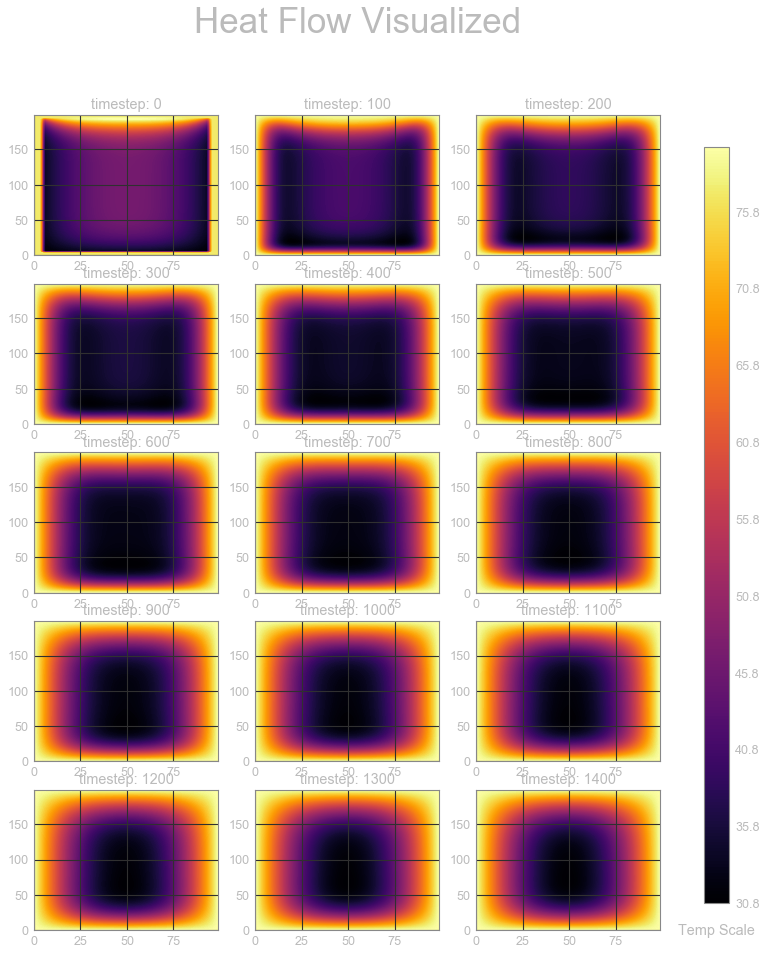

In [153]:
colorinterpolation = 250
colorMap = plt.cm.inferno

# Set a grid of discrete points over which to plot the Temperature matrix
X, Y = np.mgrid[0:len(b.u0):1, 0:len(b.u0[0]):1]

# Will act as an index for generating figures at specified timesteps
fignum = 1

# Initialize matplotlib figure
fig = plt.figure(figsize=[12, 15])
fig.suptitle('Heat Flow Visualized', fontsize=35)

# Run time series and draw heat flow snapshots
for n in range(len(b.frames[0,0,:])):
    ax = fig.add_subplot(5,3,fignum)
    im = ax.contourf(X, Y, b.frames[:,:,n], colorinterpolation, cmap=colorMap)
    ax.set_title('timestep: {}'.format(n*100))
    fignum += 1

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('Temp Scale', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

### Performance Tests

Testing the `jitclass` optimized version vs plain Python

#### Plain Python

This took obscenely long to run (over 30 seconds), so it was interrupted and not allowed to finish.

In [ ]:
class hotplate:
    def __init__(self, w=10, h=20, D=4):
        self.w = w
        self.h = h
        self.D = D

class steadystate:
    def __init__(self,
                 hotplate,
                 boundary_conditions=[100.,0.,0.,.0],
                 relaxation_guess=30.,
                 ds = 0.1,
                 maxiter=500):
        self.boundary_conditions = boundary_conditions
        self.relaxation_guess = relaxation_guess
        self.ds = 0.1
        self.maxiter = maxiter
        self.D = hotplate.D # not perfect, but okay


        # SEE: second derivatives of spatially-dependent terms
        self.dx, self.dy = ds, ds
        self.dx2, self.dy2 = (self.dx*self.dx), (self.dy*self.dy)
        self.dt = self.dx2*self.dy2 / (2 * hotplate.D * (self.dx2 + self.dy2))

        # number of discrete points in each cardinal direction
        self.nx, self.ny = int(hotplate.w/self.dx), int(hotplate.h/self.dy)

        # Initialize the array we'll do calculations on
        # and set the interior value to Tguess
        self.u0 = np.empty((self.nx, self.ny), dtype=np.float64)

        for i in range(self.nx):
            for j in range(self.ny):
                self.u0[i, j] = relaxation_guess

        # Set boundary conditions for the steady state before t=0
        self.u0[:, (self.ny-1):] = boundary_conditions[0]
        self.u0[:, :1] = boundary_conditions[1]
        self.u0[:1, :] = boundary_conditions[-2]
        self.u0[(self.nx-1):, :] = boundary_conditions[-1]
        
    def calculate(self):
        # Compute the steady state distribution, where u0 = Steady-State Temperature Matrix
        for iteration in range(0, self.maxiter):
            for i in range(1, self.nx-1):
                for j in range(1, self.ny-1):
                    self.u0[i, j] = (0.25) * (self.u0[i+1][j] + self.u0[i-1][j] +
                                        self.u0[i][j+1] + self.u0[i][j-1])

In [164]:
class hotboundaries:
    def __init__(self,
                 steadyplate, # pass in a hotplate with an initialized and/or state
                 boundary_conds=[0.0,0.0,0.0,0.0]):
        
        # New initial conditions
        Ttop_new = boundary_conds[0]
        Tbottom_new = boundary_conds[1]
        Tleft_new = boundary_conds[-2]
        Tright_new = boundary_conds[-1]

        # Set new boundary conditions in the steady-state matrix
        steadyplate.u0[:, :5] = Tbottom_new
        steadyplate.u0[(steadyplate.nx-5):, :] = Tright_new
        steadyplate.u0[:5, :] = Tleft_new
        steadyplate.u0[:, (steadyplate.ny-5):] = Ttop_new

# produce a hot spot on the plate and observe thermal diffusion
# circle of radius r, centred at c=(cx,cy)
class hotspot:
    def __init__(self,
                 steadyplate, # pass in a hotplate with an initialized and/or steady state
                 temperature = 200, # temperature of spot
                 r = 1, # radius of circle
                 c = (0, 0) # position of center of circle on plate
                 ): 
        r2 = r*r # radius-squared
        for i in range(steadyplate.nx):
            for j in range(steadyplate.ny):
                p2 = (i * steadyplate.dx - c[0])**2 + (j * steadyplate.dy - c[1])**2
                if p2 < r2:
                    steadyplate.u0[i, j] = temperature

class heatflow:    
    def do_timestep(self):
        # Propagate with forward-difference in time, central-difference in space
        self.u[1:-1, 1:-1] = self.u0[1:-1, 1:-1] + self.D * self.dt * (
            (self.u0[2:, 1:-1] - 2*self.u0[1:-1, 1:-1] + self.u0[:-2, 1:-1])/self.dx2
            + (self.u0[1:-1, 2:] - 2*self.u0[1:-1, 1:-1] + self.u0[1:-1, :-2])/self.dy2)

        self.u0 = self.u
        
    def __init__(self,
                 steadyplate # pass in a hotplate entity with an initialized and/or steady state
                ):
        self.u = steadyplate.u0.copy()
        self.u0 = steadyplate.u0
        self.dt = steadyplate.dt
        self.dx2 = steadyplate.dx2
        self.dy2 = steadyplate.dy2
        self.nx = steadyplate.nx
        self.ny = steadyplate.ny
        self.D = steadyplate.D
    
    def calculate(self,
                  tsteps, # number of time steps
                  snapshots # on which timesteps should snapshots (frames) be save for visualizing?
                  ):
        # create an array of frames for visualizing the heatflow
        self.frames = np.empty((int(self.nx), int(self.ny), len(snapshots)), dtype=np.float64)
        
        # index for saving frames on the z-axis if the self.frames
        i = 0
        
        # perform timestep calculations and save the frames
        for n in range(tsteps): 
            self.do_timestep()
            
            # save the specified frames
            if n in snapshots:
                self.frames[:,:,i] = self.u0.copy()
                i+=1

In [165]:
%%timeit
b = steadystate(hotplate(10, 20, 4),
                boundary_conditions=np.array([100.,0.,0.,.0]),
                relaxation_guess=30.,
                ds = 0.1,
                maxiter=500)

b.calculate()

b = heatflow(b)

n_timesteps = 1401 # number of timesteps of heatflow to perform
b.calculate(n_timesteps,  
            [i for i in range(n_timesteps) if (i==0 or i%100==0)])

KeyboardInterrupt: 

#### Jitted Steadystate and Plain Python Heatflow

In [230]:
import numpy as np
from numba import jit, jitclass, int64, float64

spec = [('w', int64),
        ('h', int64),
        ('D', int64)]

@jitclass(spec)
class hotplate:
    def __init__(self, w=10, h=20, D=4):
        self.w = w
        self.h = h
        self.D = D

spec = [('boundary_conditions', float64[:]),
        ('relaxation_guess',float64),
        ('ds',float64),
        ('maxiter',int64),
        ('dx', float64),
        ('dy', float64),
        ('dx2', float64),
        ('dy2', float64),
        ('nx', int64),
        ('ny', int64),
        ('dt', float64),
        ('u0', float64[:,:]),
        ('u', float64[:,:]),
        ('D', float64)]
@jitclass(spec)
class steadystate:
    def __init__(self,
                 hotplate,
                 boundary_conditions=[100.,0.,0.,.0],
                 relaxation_guess=30.,
                 ds = 0.1,
                 maxiter=500):
        self.boundary_conditions = boundary_conditions
        self.relaxation_guess = relaxation_guess
        self.ds = 0.1
        self.maxiter = maxiter
        self.D = hotplate.D # not perfect, but okay


        # SEE: second derivatives of spatially-dependent terms
        self.dx, self.dy = ds, ds
        self.dx2, self.dy2 = (self.dx*self.dx), (self.dy*self.dy)
        self.dt = self.dx2*self.dy2 / (2 * hotplate.D * (self.dx2 + self.dy2))

        # number of discrete points in each cardinal direction
        self.nx, self.ny = int(hotplate.w/self.dx), int(hotplate.h/self.dy)

        # Initialize the array we'll do calculations on
        # and set the interior value to Tguess
        self.u0 = np.empty((self.nx, self.ny), dtype=np.float64)

        for i in range(self.nx):
            for j in range(self.ny):
                self.u0[i, j] = relaxation_guess

        # Set boundary conditions for the steady state before t=0
        self.u0[:, (self.ny-1):] = boundary_conditions[0]
        self.u0[:, :1] = boundary_conditions[1]
        self.u0[:1, :] = boundary_conditions[-2]
        self.u0[(self.nx-1):, :] = boundary_conditions[-1]
        
    def calculate(self):
        # Compute the steady state distribution, where u0 = Steady-State Temperature Matrix
        for iteration in range(0, self.maxiter):
            for i in range(1, self.nx-1):
                for j in range(1, self.ny-1):
                    self.u0[i, j] = (0.25) * (self.u0[i+1][j] + self.u0[i-1][j] +
                                        self.u0[i][j+1] + self.u0[i][j-1])

In [231]:
class hotboundaries:
    def __init__(self,
                 steadyplate, # pass in a hotplate with an initialized and/or state
                 boundary_conds=[0.0,0.0,0.0,0.0]):
        
        # New initial conditions
        Ttop_new = boundary_conds[0]
        Tbottom_new = boundary_conds[1]
        Tleft_new = boundary_conds[-2]
        Tright_new = boundary_conds[-1]

        # Set new boundary conditions in the steady-state matrix
        steadyplate.u0[:, :5] = Tbottom_new
        steadyplate.u0[(steadyplate.nx-5):, :] = Tright_new
        steadyplate.u0[:5, :] = Tleft_new
        steadyplate.u0[:, (steadyplate.ny-5):] = Ttop_new

    
# produce a hot spot on the plate and observe thermal diffusion
# circle of radius r, centred at c=(cx,cy)
class hotspot:
    def __init__(self,
                 steadyplate, # pass in a hotplate with an initialized and/or steady state
                 temperature = 200, # temperature of spot
                 r = 1, # radius of circle
                 c = (0, 0) # position of center of circle on plate
                 ): 
        r2 = r*r # radius-squared
        for i in range(steadyplate.nx):
            for j in range(steadyplate.ny):
                p2 = (i * steadyplate.dx - c[0])**2 + (j * steadyplate.dy - c[1])**2
                if p2 < r2:
                    steadyplate.u0[i, j] = temperature

class heatflow:    
    def do_timestep(self):
        # Propagate with forward-difference in time, central-difference in space
        self.u[1:-1, 1:-1] = self.u0[1:-1, 1:-1] + self.D * self.dt * (
            (self.u0[2:, 1:-1] - 2*self.u0[1:-1, 1:-1] + self.u0[:-2, 1:-1])/self.dx2
            + (self.u0[1:-1, 2:] - 2*self.u0[1:-1, 1:-1] + self.u0[1:-1, :-2])/self.dy2)

        self.u0 = self.u
        
    def __init__(self,
                 steadyplate # pass in a hotplate entity with an initialized and/or steady state
                ):
        self.u = steadyplate.u0.copy()
        self.u0 = steadyplate.u0
        self.dt = steadyplate.dt
        self.dx2 = steadyplate.dx2
        self.dy2 = steadyplate.dy2
        self.nx = steadyplate.nx
        self.ny = steadyplate.ny
        self.D = steadyplate.D
    
    def calculate(self,
                  tsteps, # number of time steps
                  snapshots # on which timesteps should snapshots (frames) be save for visualizing?
                  ):
        # create an array of frames for visualizing the heatflow
        self.frames = np.empty((int(self.nx), int(self.ny), len(snapshots)), dtype=np.float64)
        
        # index for saving frames on the z-axis if the self.frames
        i = 0
        
        # perform timestep calculations and save the frames
        for n in range(tsteps): 
            self.do_timestep()
            
            # save the specified frames
            if n in snapshots:
                self.frames[:,:,i] = self.u0.copy()
                i+=1

In [232]:
%%timeit
b = steadystate(hotplate(50, 50, 4),
                boundary_conditions=np.array([100.,0.,0.,.0]),
                relaxation_guess=30.,
                ds = 0.1,
                maxiter=500)

b.calculate()

b = heatflow(b)

n_timesteps = 1401 # number of timesteps of heatflow to perform
b.calculate(n_timesteps,  
            [i for i in range(n_timesteps) if (i==0 or i%100==0)])

34.7 s ± 2.07 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Jitted Steadystate and Jitted Heatflow

In [233]:
import numpy as np
from numba import jit, jitclass, int64, float64

spec = [('w', int64),
        ('h', int64),
        ('D', int64)]

@jitclass(spec)
class hotplate:
    def __init__(self, w=10, h=20, D=4):
        self.w = w
        self.h = h
        self.D = D

spec = [('boundary_conditions', float64[:]),
        ('relaxation_guess',float64),
        ('ds',float64),
        ('maxiter',int64),
        ('dx', float64),
        ('dy', float64),
        ('dx2', float64),
        ('dy2', float64),
        ('nx', int64),
        ('ny', int64),
        ('dt', float64),
        ('u0', float64[:,:]),
        ('u', float64[:,:]),
        ('D', float64)]
@jitclass(spec)
class steadystate:
    def __init__(self,
                 hotplate,
                 boundary_conditions=[100.,0.,0.,.0],
                 relaxation_guess=30.,
                 ds = 0.1,
                 maxiter=500):
        self.boundary_conditions = boundary_conditions
        self.relaxation_guess = relaxation_guess
        self.ds = 0.1
        self.maxiter = maxiter
        self.D = hotplate.D # not perfect, but okay


        # SEE: second derivatives of spatially-dependent terms
        self.dx, self.dy = ds, ds
        self.dx2, self.dy2 = (self.dx*self.dx), (self.dy*self.dy)
        self.dt = self.dx2*self.dy2 / (2 * hotplate.D * (self.dx2 + self.dy2))

        # number of discrete points in each cardinal direction
        self.nx, self.ny = int(hotplate.w/self.dx), int(hotplate.h/self.dy)

        # Initialize the array we'll do calculations on
        # and set the interior value to Tguess
        self.u0 = np.empty((self.nx, self.ny), dtype=np.float64)

        for i in range(self.nx):
            for j in range(self.ny):
                self.u0[i, j] = relaxation_guess

        # Set boundary conditions for the steady state before t=0
        self.u0[:, (self.ny-1):] = boundary_conditions[0]
        self.u0[:, :1] = boundary_conditions[1]
        self.u0[:1, :] = boundary_conditions[-2]
        self.u0[(self.nx-1):, :] = boundary_conditions[-1]
        
    def calculate(self):
        # Compute the steady state distribution, where u0 = Steady-State Temperature Matrix
        for iteration in range(0, self.maxiter):
            for i in range(1, self.nx-1):
                for j in range(1, self.ny-1):
                    self.u0[i, j] = (0.25) * (self.u0[i+1][j] + self.u0[i-1][j] +
                                        self.u0[i][j+1] + self.u0[i][j-1])

In [234]:
spec = []
@jitclass(spec)
class hotboundaries:
    def __init__(self,
                 steadyplate, # pass in a hotplate with an initialized and/or state
                 boundary_conds=[0.0,0.0,0.0,0.0]):
        
        # New initial conditions
        Ttop_new = boundary_conds[0]
        Tbottom_new = boundary_conds[1]
        Tleft_new = boundary_conds[-2]
        Tright_new = boundary_conds[-1]

        # Set new boundary conditions in the steady-state matrix
        steadyplate.u0[:, :5] = Tbottom_new
        steadyplate.u0[(steadyplate.nx-5):, :] = Tright_new
        steadyplate.u0[:5, :] = Tleft_new
        steadyplate.u0[:, (steadyplate.ny-5):] = Ttop_new

    
# produce a hot spot on the plate and observe thermal diffusion
# circle of radius r, centred at c=(cx,cy)
spec = []
@jitclass(spec)
class hotspot:
    def __init__(self,
                 steadyplate, # pass in a hotplate with an initialized and/or steady state
                 temperature = 200, # temperature of spot
                 r = 1, # radius of circle
                 c = (0, 0) # position of center of circle on plate
                 ): 
        r2 = r*r # radius-squared
        for i in range(steadyplate.nx):
            for j in range(steadyplate.ny):
                p2 = (i * steadyplate.dx - c[0])**2 + (j * steadyplate.dy - c[1])**2
                if p2 < r2:
                    steadyplate.u0[i, j] = temperature
                    
spec = [('tsteps', int64),
        ('D', float64),
        ('dx2', float64),
        ('dy2', float64),
        ('nx', float64),
        ('ny', float64),
        ('dt', float64),
        ('u0', float64[:,:]),
        ('u', float64[:,:]),
        ('frames', float64[:,:,:])]
@jitclass(spec)
class heatflow:    
    def do_timestep(self):
        # Propagate with forward-difference in time, central-difference in space
        self.u[1:-1, 1:-1] = self.u0[1:-1, 1:-1] + self.D * self.dt * (
            (self.u0[2:, 1:-1] - 2*self.u0[1:-1, 1:-1] + self.u0[:-2, 1:-1])/self.dx2
            + (self.u0[1:-1, 2:] - 2*self.u0[1:-1, 1:-1] + self.u0[1:-1, :-2])/self.dy2)

        self.u0 = self.u
        
    def __init__(self,
                 steadyplate # pass in a hotplate entity with an initialized and/or steady state
                ):
        self.u = steadyplate.u0.copy()
        self.u0 = steadyplate.u0
        self.dt = steadyplate.dt
        self.dx2 = steadyplate.dx2
        self.dy2 = steadyplate.dy2
        self.nx = steadyplate.nx
        self.ny = steadyplate.ny
        self.D = steadyplate.D
    
    def calculate(self,
                  tsteps, # number of time steps
                  snapshots # on which timesteps should snapshots (frames) be save for visualizing?
                  ):
        # create an array of frames for visualizing the heatflow
        self.frames = np.empty((int(self.nx), int(self.ny), len(snapshots)), dtype=np.float64)
        
        # index for saving frames on the z-axis if the self.frames
        i = 0
        
        # perform timestep calculations and save the frames
        for n in range(tsteps): 
            self.do_timestep()
            
            # save the specified frames
            if n in snapshots:
                self.frames[:,:,i] = self.u0.copy()
                i+=1

In [235]:
%%timeit
b = steadystate(hotplate(50, 50, 4),
                boundary_conditions=np.array([100.,0.,0.,.0]),
                relaxation_guess=30.,
                ds = 0.1,
                maxiter=500)

b.calculate()

b = heatflow(b)

n_timesteps = 1401 # number of timesteps of heatflow to perform
b.calculate(n_timesteps,  
            [i for i in range(n_timesteps) if (i==0 or i%100==0)])

15.4 s ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Results

Jitting the heatflow class gives a humble __~2x__ speedup for larger arrays (500x500), and *a minor performance decrease for small arrays (around 200x200 and smaller)*. The reason why the speedup is so meager is because the heaviest computations are already performed by Numpy's underlying C-compiled code.

The fact of the matter here is that we get speedups for everything *except* the computations, and likely see minor additional overhead since those parts are already compiled to machine code.

## Handprint

This feature will allow a user to import any image whose color scale represents an initial temperature distribution on a flat rectangular surface and visualize the flow of heat diffusion on that surface.

The intended use of this involves creating a spot/patch/shape on a rectangular surface which has a particular shape.

<class 'numpy.ndarray'>


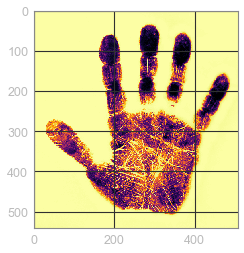

In [123]:
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()
%matplotlib inline

import numpy as np

image = rescale(rgb2gray(io.imread('handprint.jpg')), 1.0 / 2.0,
                mode='constant')

print(type(image))
plt.imshow(image, cmap='inferno')

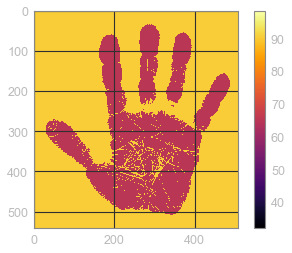

In [125]:
for i in range(len(image)):
    for j in range(len(image[0])):
        if image[i, j] >= 0.9:
            image[i, j] = 65 #None
        else:
            image[i, j] = 90.7
            
plt.imshow(image, cmap='inferno', vmin=32, vmax = 98.5);
plt.colorbar()

In [110]:
w, h = image.shape

print(w, h)

542 508


In [111]:
b = steadystate(hotplate(w, h, 4),
                boundary_conditions=np.array([30.,30.,30.,30.]),
                relaxation_guess=30.,
                ds = 1,
                maxiter=500)

b.u0 = image.copy()
b.calculate()

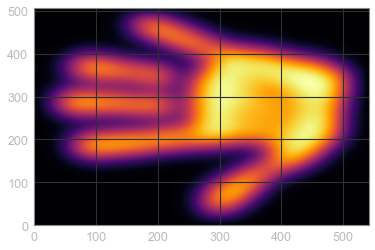

In [112]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
X, Y = np.mgrid[0:len(b.u0):1, 0:len(b.u0[0]):1]

plt.contourf(X, Y, b.u0, 250, cmap=plt.cm.inferno)

In [113]:
b = heatflow(b)

n_timesteps = 2001 # number of timesteps of heatflow to perform
b.calculate(n_timesteps,  
            [i for i in range(n_timesteps) if (i==0 or i%200==0)])

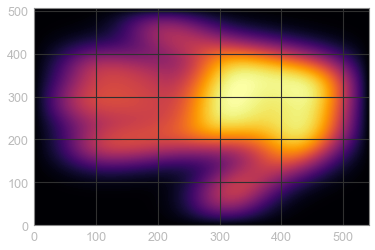

In [118]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
X, Y = np.mgrid[0:len(b.u0):1, 0:len(b.u0[0]):1]

plt.contourf(X, Y, b.frames[:,:,-1], 250, cmap=plt.cm.inferno)